# ZOMATO EDA

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

#To avoid displaying the FutureWarning:
import warnings
warnings.filterwarnings(action='ignore')

In [135]:
# Reading the Data -
zomato_df = pd.read_csv('zomato2.csv')
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [136]:
# Now, Very First, I'm going to Check What are my different different 'Columns'.
zomato_df.columns

Index(['res_id', 'name', 'establishment', 'city', 'city_id', 'locality',
       'latitude', 'longitude', 'cuisines', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'delivery', 'No. of Cuisines', 'type_of_meal', 'takeaway', 'card_type',
       'cash_payment', 'Seating', 'Pure Veg'],
      dtype='object')

In [137]:
# Now, Let's Check the Data Types of Each and Every "Column".
zomato_df.dtypes

res_id                    int64
name                     object
establishment            object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
delivery                 object
No. of Cuisines           int64
type_of_meal             object
takeaway                  int64
card_type                object
cash_payment              int64
Seating                  object
Pure Veg                 object
dtype: object

In [138]:
# Now, Let's Check What exactly the "Shape" of this DataFrame.
zomato_df.shape

(55568, 23)

In [139]:
#Checking "Missing Values" against each Features -
zomato_df.isnull().sum()

res_id                  0
name                    0
establishment           0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
delivery                0
No. of Cuisines         0
type_of_meal            0
takeaway                0
card_type               0
cash_payment            0
Seating                 0
Pure Veg                0
dtype: int64

# case - 1

1. calculate Avg. Rating of Resturant

In [140]:
#Q1. Calculate Avg. Rating of each Restaurant -->

zomato_df.groupby('name')['aggregate_rating'].mean()

name
# Wednesday                            3.5
#1, Culinary Avenue - The Red Maple    3.9
#788 Avenue                            3.9
#BC                                    4.2
#BEiR                                  4.1
                                      ... 
 Food Street - Veg                     2.9
ट 4 Tasty                              3.7
द Vege टेबल                            4.2
स्पेस Bar                              4.3
ह-tea The Tea Hut                      4.2
Name: aggregate_rating, Length: 41100, dtype: float64

In [141]:
#Now, Convert it into DataFrame -
zomato_df.groupby('name')['aggregate_rating'].mean().to_frame()

aggregate_rating
name                                                 
# Wednesday                                       3.5
#1, Culinary Avenue - The Red Maple               3.9
#788 Avenue                                       3.9
#BC                                               4.2
#BEiR                                             4.1
...                                               ...
 Food Street - Veg                                2.9
ट 4 Tasty                                         3.7
द Vege टेबल                                       4.2
स्पेस Bar                                         4.3
ह-tea The Tea Hut                                 4.2

[41100 rows x 1 columns]

In [142]:
#Now, Let's Call "reset_index()" over here -

zomato_df.groupby('name')['aggregate_rating'].mean().to_frame().reset_index()

name  aggregate_rating
0                              # Wednesday               3.5
1      #1, Culinary Avenue - The Red Maple               3.9
2                              #788 Avenue               3.9
3                                      #BC               4.2
4                                    #BEiR               4.1
...                                    ...               ...
41095                    Food Street - Veg               2.9
41096                            ट 4 Tasty               3.7
41097                          द Vege टेबल               4.2
41098                            स्पेस Bar               4.3
41099                    ह-tea The Tea Hut               4.2

[41100 rows x 2 columns]

In [143]:
#Let's, just 'Store' it in "df_rate" -->
df_rate = zomato_df.groupby('name')['aggregate_rating'].mean().to_frame().reset_index()
df_rate

name  aggregate_rating
0                              # Wednesday               3.5
1      #1, Culinary Avenue - The Red Maple               3.9
2                              #788 Avenue               3.9
3                                      #BC               4.2
4                                    #BEiR               4.1
...                                    ...               ...
41095                    Food Street - Veg               2.9
41096                            ट 4 Tasty               3.7
41097                          द Vege टेबल               4.2
41098                            स्पेस Bar               4.3
41099                    ह-tea The Tea Hut               4.2

[41100 rows x 2 columns]

In [144]:
#Now, Let's "Rename" our Columns to more "Meaningful" Ones.
df_rate = zomato_df.groupby('name')['aggregate_rating'].mean().to_frame().reset_index()
df_rate.columns = ['Restaurant', 'Avg. Rating']         #Here, you go.
df_rate.head(10)


Restaurant  Avg. Rating
0                          # Wednesday          3.5
1  #1, Culinary Avenue - The Red Maple          3.9
2                          #788 Avenue          3.9
3                                  #BC          4.2
4                                #BEiR          4.1
5                         #Dilliwaala6          4.2
6                       #Jaipur Darbar          3.4
7                          #OFF Campus          4.0
8                         #Selfieccino          3.3
9            #Underground Restro & Bar          3.2

Conclusion -

So, from this you can see each and every 'Restaurant' has different different "Average Rating".
It means somewhere between "3 to 4" are our Moderate Restaurants and greater than "4", we can say, these are our Indian Restaurant.

<AxesSubplot:xlabel='Avg. Rating', ylabel='Density'>

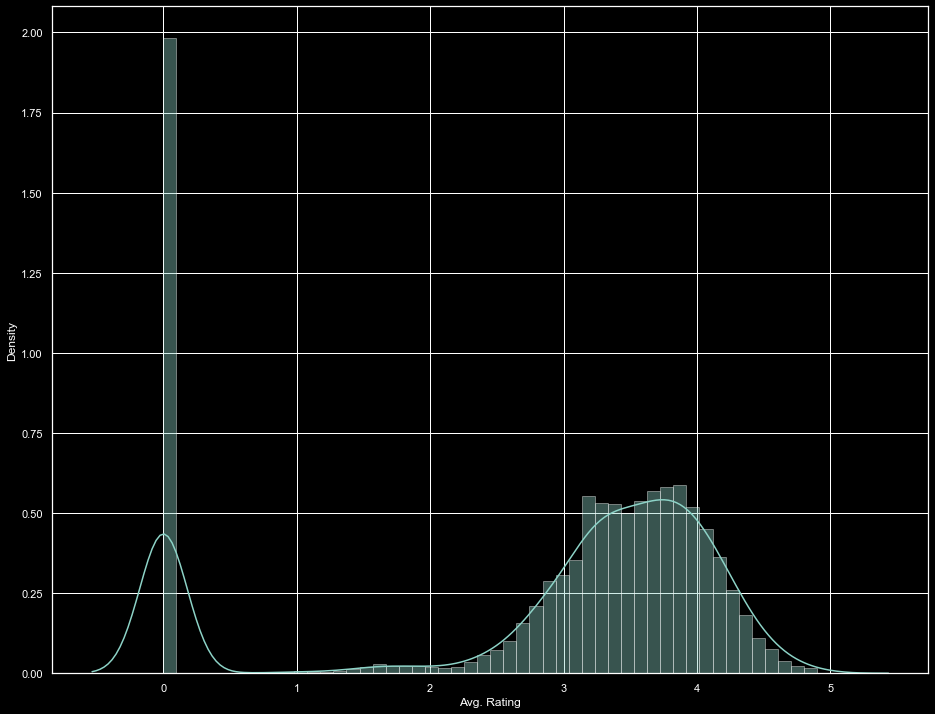

In [145]:
#Q2. Now, Let's Check the distribution of 'Rating' Column & Try to Find out What distribution it follows -->

sns.distplot(df_rate['Avg. Rating'])

Conclusion -

Now, from this One, we can say that it is somehow "Normally Distributed", but some of the "Restaurants" has "0 Ratings because, we have already Replaced our "New" and "-" by "0". That's why here we have "Zero".
But from the 2nd one, we can say that we have some of the "Restaurants" that are "Very High Rated" (i.e. Almost "5") and almost "50 Percent" of the 'Restaurant' has a "Rating" between this "3 to 4" and "Restaurants" having More than "4.5" 'Ratings' are "very Rare".

In [146]:
#Q3. Top Restaurant Chains in Bengalore -->

top_20_restaurant_chains = zomato_df['name'].value_counts()[0:20]
top_20_restaurant_chains

Domino's Pizza            399
Cafe Coffee Day           315
KFC                       204
Baskin Robbins            202
Keventers                 189
Subway                    178
McDonald's                130
Pizza Hut                 125
Barbeque Nation           112
Burger King               110
Monginis                  106
The Chocolate Room         72
Giani's                    71
The Belgian Waffle Co.     69
Frozen Bottle              68
ibaco                      65
Lassi Shop                 60
Behrouz Biryani            59
Kanti Sweets               59
Green Chick Chop           56
Name: name, dtype: int64

In [147]:
#Just, Converted to DataFrame, to see What is our "Index" & "Column".

top_20_restaurant_chains = zomato_df['name'].value_counts()[0:20]
top_20_restaurant_chains.to_frame().head()

name
Domino's Pizza    399
Cafe Coffee Day   315
KFC               204
Baskin Robbins    202
Keventers         189

Text(0, 0.5, 'Name of the Restaurants')

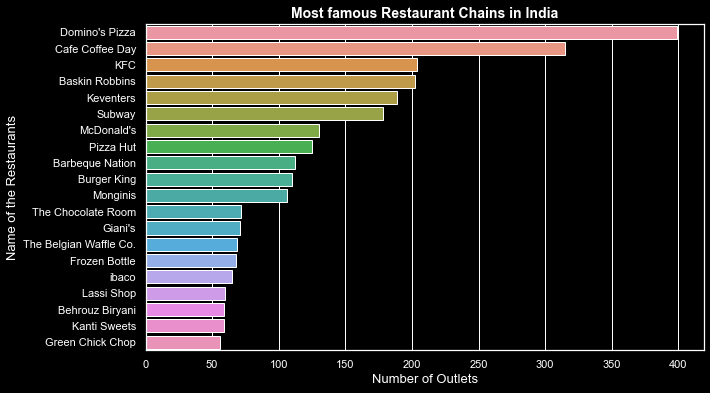

In [148]:
#Now, Let's Plot "Bar Chart" -

plt.figure(figsize = (10, 6))

sns.barplot(x = top_20_restaurant_chains,
           y = top_20_restaurant_chains.index)

plt.title("Most famous Restaurant Chains in India", fontsize = 14, fontweight = 'bold')
plt.xlabel("Number of Outlets", fontsize = 13)
plt.ylabel("Name of the Restaurants", fontsize = 13)

Conclusion -

Now, from this we can see that we have a "Domimo's Pizza" on Peak, then we have "Cafe Coffee Day", then we have "KFC" and so on.
So, these are our "Top 20 Restaurant Chains in India".

In [149]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [150]:
#Q4. How many of the Restaurant do not Accept Online Orders -->

value_counts = zomato_df['delivery'].value_counts()
value_counts

Yes    37346
No     18222
Name: delivery, dtype: int64

In [151]:
zomato_df['delivery'].value_counts().index

Index(['Yes', 'No'], dtype='object')

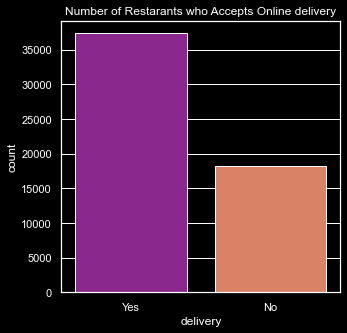

In [152]:
#Number of Restarants who Accepts Online Order - 
fig = plt.subplots(figsize = (5,5))
sns.set_style="darkgrid"

sns.countplot(x = zomato_df["delivery"], order = zomato_df["delivery"].value_counts().index, palette = "plasma")
# plt.xticks(rotation = 0)
plt.title("Number of Restarants who Accepts Online delivery")
plt.show()

Conclusion -

Approximately, More than "37.3 K" Restaurants accepts Online Order whereas around "17.9 K" Restaurants does not accepts Online Order & 315 Restaurants dont have any status.

In [153]:
#Now, Let's Plot this Data using a "Pie Chart" as we have Less Number of Entries, using "Plotly".

#Let's 1st Install "Plotly" -
!pip install plotly

In [154]:
#Now, Let's Import our "plotly" -
import plotly.express as px


In [155]:
#Alternate Visual: Now, Let's Plot this Data using a "Pie Chart" as we have Less Number of Entries, using "Plotly".

labels = ['Delivery', 'Not Delivery']

px.pie(data_frame = zomato_df,
      values = value_counts,
      names = labels,
      title = 'Restaurants Online Delivery Distribution')

#After Executing the Cell. Now, we can see Much More Interactive Graph.

Conclusion -

From this Pie Chart, We can say, around "67.2%" Restaurants accepts Online delivery whereas around "32.8%" Restaurants does not accepts Online delivery.

# Use Case 2 -

In [156]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [1]:
#Q1. Ratio between Restaurant that provide Indoor Seating & Outdoor Seating? -->

book_table_value_counts = zomato_df['Seating'].value_counts()
book_table_value_counts

#Conclusion: So, this will Exactly Return me about "36.5K" Hotels or Restaurant that doesn't provide the facility of "booking 
#Table" whereas only "6.4K" Hotels provides the facility of "booking Table".

NameError: name 'zomato_df' is not defined

In [158]:
#Again, Let's make a use of "plotly" "pie" Chart -

labels = ['Indoor Seating', 'Outdoor Seating']

px.pie(data_frame = zomato_df,
      values = book_table_value_counts,
      names = labels)

Conclusion -

From this Pie Chart, We can say, around "90.2%" Restaurants  provides the facility of "Indoor Seating" whereas around "9.83%" Restaurants provide the facility of "Outdoor Seating"

In [159]:
#Alternate Way - of Creating the Pie Chart using "plotly.graph_objs":
import plotly.graph_objs as go
from plotly.offline import iplot

In [160]:
#Alternate Visual -
labels = ['Indoor Seating', 'Outdoor Seating']

trace = go.Pie(labels = labels, 
               values=book_table_value_counts,
               hoverinfo = 'label+percent',
               textinfo = 'value')
iplot([trace])

Conclusion -

So, from this "Pie Chart", we can Visualize that around "90.2% of the Total Restaurant provide "Indoor Seating" Facility , whereas "9.8%" provide facility of Outdoor Seating.

In [161]:
zomato_df.head()


res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [162]:
#Q2. In-depth Analysis of Types of Restaurant we have -->

zomato_df['cuisines'].value_counts().nlargest(20)

North Indian                          4295
Fast Food                             2025
North Indian, Chinese                 1636
Bakery                                1585
South Indian                          1489
Street Food                           1187
Cafe                                  1098
Mithai                                1020
Desserts                               922
Bakery, Desserts                       836
Beverages                              817
Finger Food                            642
Mithai, Street Food                    612
Pizza, Fast Food                       608
Chinese                                607
Ice Cream                              552
Ice Cream, Desserts                    551
No cuisine                             470
Bakery, Fast Food                      468
North Indian, Chinese, Continental     414
Name: cuisines, dtype: int64

In [163]:
#Checking the Total Types of Restaurant we have -

len(zomato_df['establishment'].unique())

26

In [164]:
#Suppose, we want "Top 20" cuisines Types that Serves more than All these Restaurant.
    
fig = px.bar(data_frame = zomato_df, 
             x = zomato_df['establishment'].value_counts().nlargest(20).index, 
             y = zomato_df['establishment'].value_counts().nlargest(20), 
             color = zomato_df['establishment'].value_counts().nlargest(20).index, 
             labels = {'x':'cuisines Type', 'y':'No. of cuisines Type'},
             title = 'Top 20 cuisines Types')

fig.update_layout(showlegend=False)

Conclusion - These are our Top 20 cuisines.

So from this, We can see "Quick Bites" have somewhere around 15.86K, whereas the "Casual Dinning" has 12.27K, "cafe" has around 4.1K.

In [165]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

<AxesSubplot:xlabel='name'>

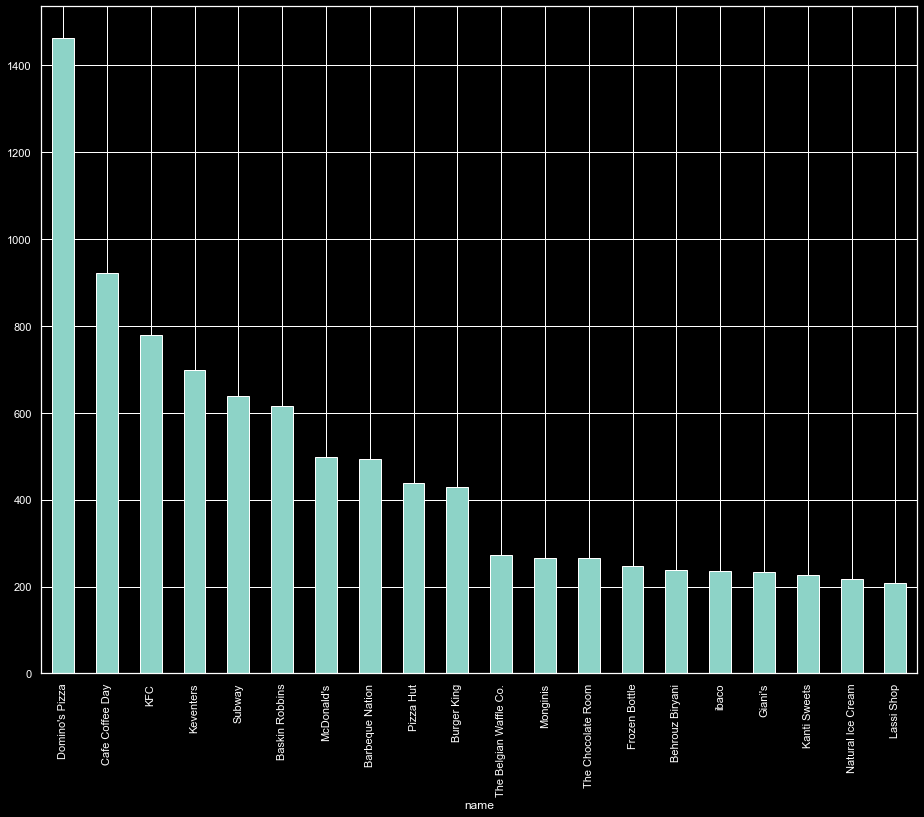

In [166]:
# Highest Voted Restaurant -

zomato_df.groupby('name')['aggregate_rating'].sum().nlargest(20).plot.bar()

In [167]:
zomato_df.groupby('name')['aggregate_rating'].sum().nlargest(20).to_frame().head()

aggregate_rating
name                             
Domino's Pizza             1462.5
Cafe Coffee Day             921.0
KFC                         779.8
Keventers                   699.7
Subway                      638.6

In [168]:
#Alternate Visual - 

px.bar(data_frame = zomato_df,
      x = zomato_df.groupby('name')['votes'].sum().nlargest(20).index,
      y = zomato_df.groupby('name')['votes'].sum().nlargest(20), 
      color = zomato_df.groupby('name')['votes'].sum().nlargest(20), 
      labels = {'x':'Name of the Restaurants', 'y':'Total Votes'}, 
       title = 'Highest Voted Restaurants')

Conclusion -

From this, we can say that our Highest Voted Restaurant is "Domino's Pizza", followed by "Barbeque Nation" and "KFC".
So, you can come up with this Conclusion.

In [169]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [170]:
#What are the Total Restaurants at different locations of Bengalore -

restaurant=[]
location=[]
for key,location_df in zomato_df.groupby('city'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))



In [171]:
#So, Let's move-on to Create a DataFrame.

df_total = pd.DataFrame(zip(location, restaurant))
df_total.columns = ['city', 'Restaurant_Count']
df_total

city  Restaurant_Count
0         Agra               758
1    Ahmedabad               966
2        Ajmer               383
3    Alappuzha               239
4    Allahabad               521
..         ...               ...
94    Varanasi               546
95     Vellore               270
96  Vijayawada               413
97       Vizag               601
98    Zirakpur               140

[99 rows x 2 columns]

In [172]:
#Just a Cross Checking -
zomato_df.groupby('city')[['name']].count()

name
city            
Agra         833
Ahmedabad   1247
Ajmer        400
Alappuzha    255
Allahabad    547
...          ...
Varanasi     583
Vellore      295
Vijayawada   482
Vizag        694
Zirakpur     150

[99 rows x 1 columns]

In [173]:
#Just a Cross Checking -
df_1 = zomato_df.groupby('city')['name'].unique().to_frame().reset_index()
df_1

city                                               name
0         Agra  [Bikanervala, Mama Chicken Mama Franky House, ...
1    Ahmedabad  [Ph Se Food, Millhouse, The Red Bistro, Kadak ...
2        Ajmer  [Mango Masala Restaurant, Rasoi, Bansi Wala, D...
3    Alappuzha  [Madras Veg Tables, Halais Family Restaurant, ...
4    Allahabad  [Eat On, KFC, 7th Heaven, Sagar Ratna, Pizza H...
..         ...                                                ...
94    Varanasi  [Capsicum, Maharaja Restaurant, KFC, Domino's ...
95     Vellore  [The Vellore Kitchen, Barbeque Nation, Tom's D...
96  Vijayawada  [Madhurima Restaurant, Sri Anjaneya Restaurant...
97       Vizag  [Alpha Hotel, Zeeshan Restaurant - Apna Hydera...
98    Zirakpur  [Hangry, Fuse Bar - Radisson Hotel, Bottle Roo...

[99 rows x 2 columns]

In [174]:
#Just a Cross Checking -
df_1['name'][0]

array(['Bikanervala', 'Mama Chicken Mama Franky House', 'Bhagat Halwai',
       'The Salt Cafe Kitchen & Bar', "Domino's Pizza",
       'Honeydew Restaurant', 'Cake House', 'Sugar N Thyme', 'Hichkee',
       'Pizza Hut', 'Yadav Dhaba Purana', 'Aahar', 'Pinch Of Spice',
       "Mc Donald's", 'GMB - Gopika Sweets & Restaurant',
       'The Greener Side', 'Jain Bhojnalaya', 'Papa Ji Da Dhaba',
       'Chokho Jeeman Marwari Jain Bhojanalya', 'Urban Deck',
       'Kiskey Whiskey', 'Manoj Restaurant', 'Amritsari Kulcha Junction',
       'Deviram Food Circle', 'Subway', 'Cafe Turquoise Cottage',
       'Guru Kripa Yadav Dhaba', "Tea'se Me - Rooftop Tea Boutique",
       'Chimmanlal Puri Wale', 'The Momo Corner', 'Jain Restaurant',
       'Pind Balluchi', 'Bhadawar Hotel', 'Mocha', 'CHHAT - Over The Top',
       'Pari Family Restaurant', 'KFC', 'Jahanpanah', 'What The Food',
       'Shree Balaji Family Restaurant', 'Chapter 1 Cafe',
       'Sardar Ji Da Dhaba', 'Rohit Cakes And Bakes', 'The Bi

In [175]:
#Just a Cross Checking -
len(df_1['name'][0])

758

In [176]:
#Just a Cross Checking -
df_1['name'][1]

array(['Ph Se Food', 'Millhouse', 'The Red Bistro', 'Kadak Bhagat',
       'Urban Khichdi', 'Soulmate - Make Moments Memorable',
       'Huber & Holly', 'Eleven 11 Restro Cafe', 'Anjoy Latenight Meals',
       'The Esplendido Cafe', "La Pino'z Pizza", "RP's Pizzeria",
       'I Love Sandwich House', 'Wok On Fire', 'Mocha',
       'Kabir Restaurant', 'Parosa', "Yash's GBT", 'The Mondo Kitchen',
       'Chalk & Cheese', 'Jay Nilkanth Food',
       'Legends Of Punjab - By Pepperazi', 'Swati Snacks',
       'Brick Kitchen - Five Petals', 'The Secret Kitchen', 'Loft',
       'Queso Y Cafe', 'Shree Annpurna', 'Khichdi Etc', '@Mango',
       'Cafe De Italiano', 'Ristretto - Behind the Rods', 'Eat Punjab',
       'Kailash Parbat', 'Indian Swag', 'Tea Villa Cafe',
       'Tinello - Hyatt Regency', 'Agashiye - The House Of MG',
       'Gordhan Thaal', 'Hotel Moti Mahal', "Domino's Pizza",
       'Food On Way', "Fozzie's Pizzaiolo. Cafe. Deli", 'Sale and Pepe',
       'Jay Bhavani Vadapav', 'Barb

In [177]:
#Just a Cross Checking -
len(df_1['name'][1])

966

In [178]:
#Just a Cross Checking -
df_1['name'][2]

array(['Mango Masala Restaurant', 'Rasoi', 'Bansi Wala', "Domino's Pizza",
       'Gangaur Pizza Point', 'The Burger Street', 'The Big Bunny',
       'Mahadev Ka Dhaba', 'Foodies', 'Guddan Ka Dhaba', 'Cafe Ate Pm',
       "Chick'n express", '7 Spices', 'Burger King', 'Roll Express',
       'Mango Curry', "WTF What's The Food", 'Roll Street',
       "Shankar's Chaat", 'Mr Beans Pizza', 'Inbox',
       'Kebabs & Curries Company', 'Old Mahadev Ka Dhaba', 'Mamta Sweets',
       'Kha Lo', 'Sunny Di Hatti Amritsari', 'Khokha',
       'Paapi पेट The Restaurant', 'Pizza Hut', 'Ambrosia Restaurant',
       'Subway', "Arora's Restaurant", 'Crazy Tales', 'Bambaiya Vada Paw',
       'Cake Craft By Mango Masala', 'Pizzeria By Mango Masala',
       'Honeydew', 'Tea Connect', "Mamaji's Chicken Point",
       'Happiness By Bake My Day', 'Chatkaraa', 'Coffo Holic',
       'Don Tomato', 'Ashu Sweets And Bakers', 'Kesar', 'The Rolls Yard',
       "Manoj's Kake Di Hatti", 'Mast Punjabi Tadka',
       'Baa

In [179]:
#Just a Cross Checking -
len(df_1['name'][2])

383

In [180]:
#Just a Cross Checking -
len(df_1['name'][3])

239

In [181]:
#Just a Cross Checking -
len(df_1['name'][4])

521

In [182]:
#Back to our Problem Statement -
df_total.head()

city  Restaurant_Count
0       Agra               758
1  Ahmedabad               966
2      Ajmer               383
3  Alappuzha               239
4  Allahabad               521

In [183]:
#Now, suppose if we have to Find-out the "Top 10 Places that have Maximum Number of Restaurant".

df_total.set_index('city', inplace=True)
df_total



Restaurant_Count
city                        
Agra                     758
Ahmedabad                966
Ajmer                    383
Alappuzha                239
Allahabad                521
...                      ...
Varanasi                 546
Vellore                  270
Vijayawada               413
Vizag                    601
Zirakpur                 140

[99 rows x 1 columns]

<AxesSubplot:xlabel='city'>

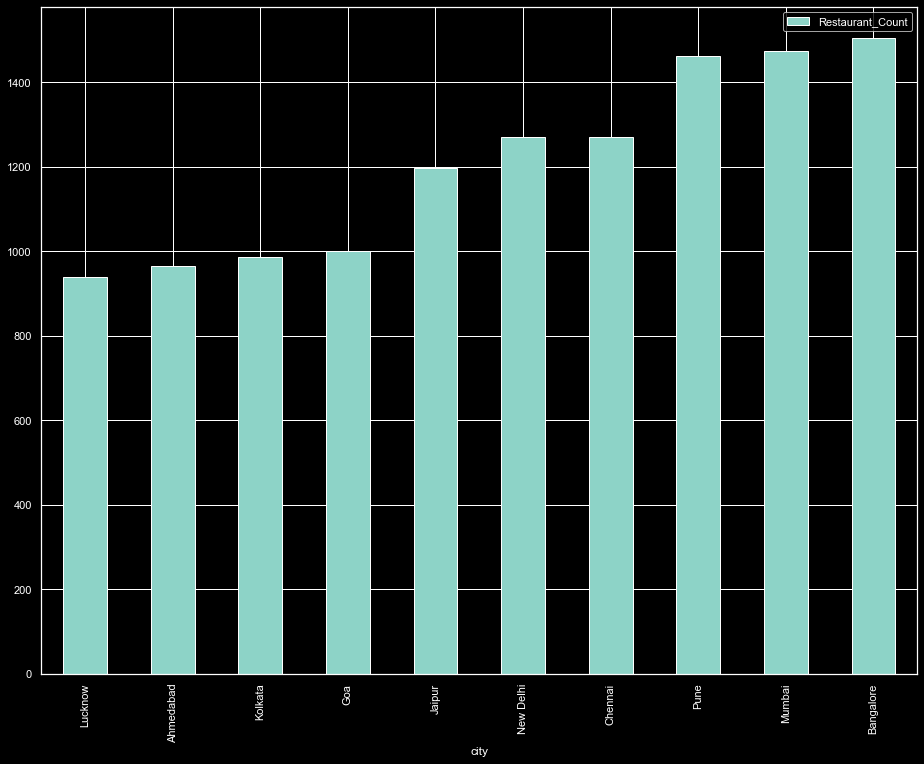

In [184]:
#So, Let's "sort_values()" which will give us the "Top 10 Places" that have "Highest Number of Restaurant".

df_total.sort_values(by='Restaurant_Count').tail(10).plot.bar()

In [185]:
#Alternate Way - Plot the same using "Plotly" -->
df_total.head()

Restaurant_Count
city                       
Agra                    758
Ahmedabad               966
Ajmer                   383
Alappuzha               239
Allahabad               521

In [186]:
df_total.dtypes      #Checking the Data Types.

Restaurant_Count    int64
dtype: object

In [187]:
df_total.reset_index().head()

city  Restaurant_Count
0       Agra               758
1  Ahmedabad               966
2      Ajmer               383
3  Alappuzha               239
4  Allahabad               521

In [188]:
df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10).to_frame().head()     #Created a "group" and filtered to 
#"Top 10" Values.

Restaurant_Count
city                       
Bangalore              1504
Mumbai                 1474
Pune                   1462
Chennai                1271
New Delhi              1271

In [189]:
#Alternate Visual - Using "Plotly" -->
px.bar(data_frame=df_total,
      x=df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10).index,
      y=df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10),
      color=df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10))

Conclusion -

So from this, We can say, Civil Lines  and Model Town has the Maximum Number of Restaurants.

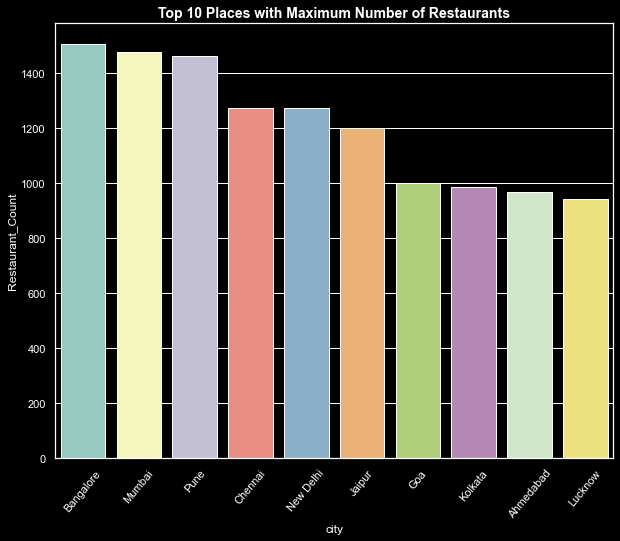

In [190]:
#Another Alternative - Using "Seaborn".
plt.figure(figsize=(10,8))

sns.barplot(x=df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10).index,
           y=df_total.groupby('city')['Restaurant_Count'].sum().nlargest(10))

plt.xticks(rotation=50)
plt.title("Top 10 Places with Maximum Number of Restaurants", fontsize=14, weight='bold')

plt.show()

# Analysing Price of Restaurant

In [191]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [192]:
zomato_df['cuisines'].isnull().sum()

0

In [193]:
# Total Number of variety of Restaurants in Bangalore.

#Suppose, we want First "Top 10 cuisines".

zomato_df['cuisines'].value_counts()[0:10]

North Indian             4295
Fast Food                2025
North Indian, Chinese    1636
Bakery                   1585
South Indian             1489
Street Food              1187
Cafe                     1098
Mithai                   1020
Desserts                  922
Bakery, Desserts          836
Name: cuisines, dtype: int64

In [194]:
#Now, Let's plot this data -

px.bar(x=zomato_df['cuisines'].value_counts()[0:10].index,
      y=zomato_df['cuisines'].value_counts()[0:10])

Conclusion -

So from this, we can observe that the North Indian and Chinese, South Indian, Cafe, Bakery, Biryani, of course, are most Common.
It means Bangalore is more influenced by North Indian culture more than South.

In [195]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [196]:
#  Analyse Approx. Cost of 2 People -->

#Very first, Let's Check whether it has some "NaN" Value or not.

zomato_df['average_cost_for_two'].isnull().sum()
#Here, we can see that we have somewhere around "250" Missing Values.

0

In [197]:
#"drop" All the "Missing Values" -

zomato_df.dropna(axis='index', subset=['average_cost_for_two'], inplace=True)

In [198]:
#Let's Check the current DataType of this Feature -
zomato_df['average_cost_for_two'].dtype

dtype('int64')

In [199]:
#So,Let's Check "unique()" Values.

zomato_df['average_cost_for_two'].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

In [200]:
#Converting the Data Type -
zomato_df['average_cost_for_two'] = zomato_df['average_cost_for_two'].astype(int)

<AxesSubplot:xlabel='average_cost_for_two', ylabel='Density'>

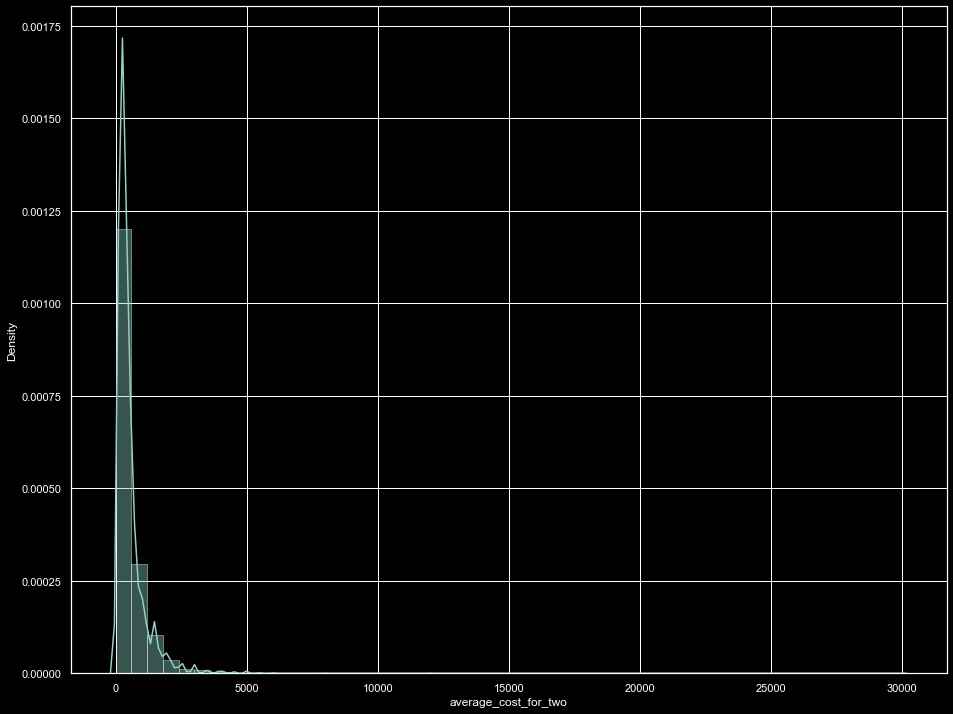

In [201]:
#But very first, I'm going to Check the "Distribution" of this one.
sns.distplot(zomato_df['average_cost_for_two'])

In [202]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

<AxesSubplot:xlabel='aggregate_rating', ylabel='average_cost_for_two'>

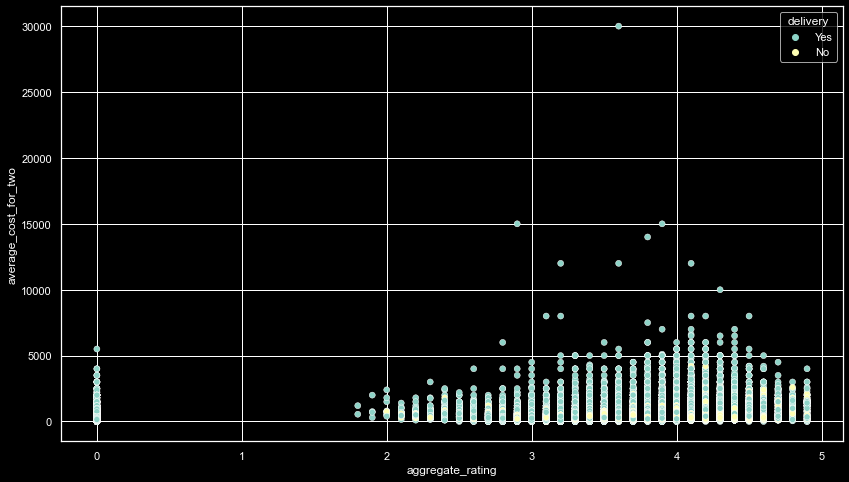

In [203]:
# . Analyse "average_cost_for_two" vs "Rating". Find out the relationship between them.

plt.figure(figsize=(14, 8))

sns.scatterplot(x='aggregate_rating',
               y='average_cost_for_two',
                hue='delivery',
                data=zomato_df)

In [204]:
#Alternative Visual - Using "Plotly" -->
px.scatter(data_frame=zomato_df,
           x='aggregate_rating',
           y='average_cost_for_two',
          color='delivery', 
           title="Approx Cost of 2 People vs Rating")

Conclusion -

Most of the Highest Rated Restaurants Accepts "delivery online" and they are, of course, affordable whereas there are some Highest Rated Restaurants who do Not Accepts "delivery online" and they are Expensive.

<AxesSubplot:xlabel='delivery', ylabel='votes'>

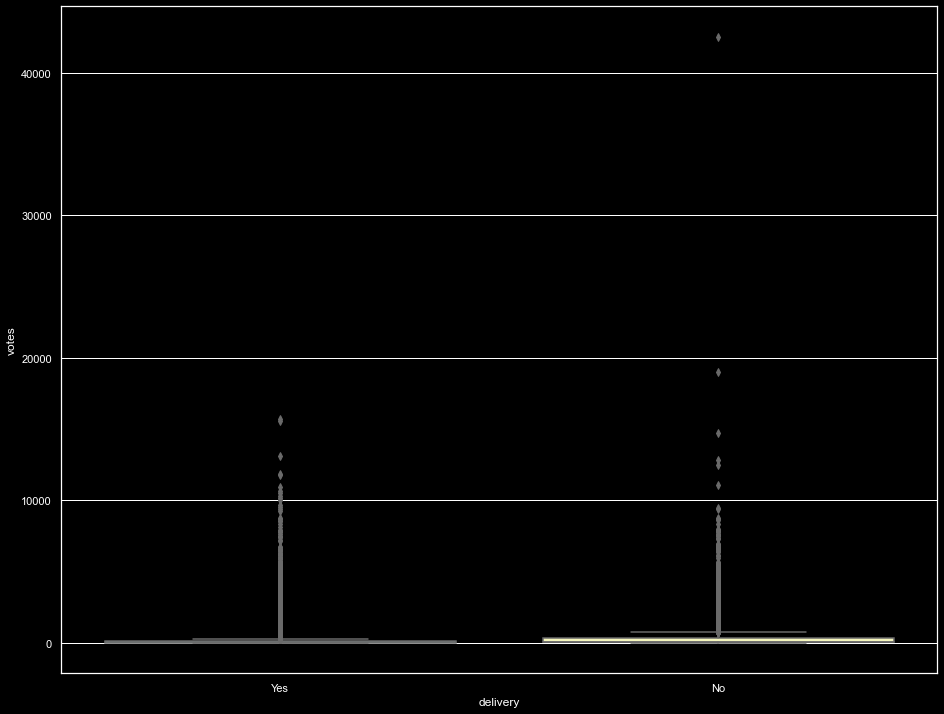

In [205]:
# Is there any difference b/w 'Votes' and 'Restaurants' Accepting and Not Accepting "Online_Orders".

#So, Let's Call our "Box Plot".

sns.boxplot(x='delivery',
           y='votes',
           data=zomato_df)

#It is a little bit difficult to Come up with some Conclusion.

In [206]:
px.box(data_frame=zomato_df,
       x='delivery',
       y='votes', 
       color='delivery')

Conclusion -

So from this, look at the Top Most DataPoint of "No", this exactly saying that, "Online_delivery = No" and "Votes" are somewhere around "14K" And
And At the Box_Plot of "No", will see this exactly is our Min. Value and we've a Median = 34.
And Now, if I look at the At the Box_Plot of "Yes", So it is basically saying that, we've "Median = 85".
So, From this Visualization, we can come up with a Conclusion here, "Median" Number of Votes for both Categories Varies because the Restaurant who's Accepting "Online delivery", get More "Votes" from Customers as there is a "Rating" Option popping up after each 'Order Place' from the "Zomato" Application.
That's Why Restaurants having 'Online Order' faciliy has "Maximum Number of Votes"

In [207]:
# Is there any difference b/w 'Prices' and 'Restaurants' Accepting and Not Accepting "Online_Orders".
    
px.box(data_frame=zomato_df,
       x='delivery',
       y='average_cost_for_two')

#So, this Exactly is the "Box Plot" right now.

Conclusion -

"Yes" means they (Restaurants) are Accepting "Online delivery" and "No" is basically means they are Not Accepting "Online delivery".
So, From this Visualization, you can come up with a Conclusion.
Restaurant Accepting "Online delivery" are More Affordable than Restaurants who are Not Accepting "Online delivery" same we can see here in No that We have some Data Points that are Higher in Range

# Analysing Insights from Restaurant Patterns

In [208]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [209]:
#Find out Most Luxurious Restaurants of India.

#Very First, To Find out, Least Luxurious Restaurants of Bangalore, will call 'min() on "approx_cost(for two people)" Column

zomato_df['average_cost_for_two'].min() 

0

In [210]:
zomato_df['average_cost_for_two'].max() 

30000

In [211]:
#So, Let's proceed with our Problem Statement - To Find out Most Luxurious Restaurant of Bangalore.

zomato_df[zomato_df['average_cost_for_two']==6000]

res_id                                        name establishment  \
57      3400059                       Peshawri - ITC Mughal   Fine Dining   
101     3400107             Esphahan - The Oberoi Amarvilas   Fine Dining   
5147      50862                  Royal Afghan - ITC Windsor   Fine Dining   
5148      59215      Le Cirque Signature - The Leela Palace   Fine Dining   
14469      2725              The Spice Route - The Imperial   Fine Dining   
16406  18624950    The Theatre Club & Lounge - Radisson Blu        Lounge   
16760      4809                       Amaranta - The Oberoi   Fine Dining   
16761    301523  Nostalgia at 1911 Brasserie - The Imperial   Fine Dining   
23507    100421               Swapna Mahal - The Raj Palace   Fine Dining   
23508    103087    Sheesh Mahal-Virasat Heritage Restaurant   Fine Dining   
37351     38062                        Celini - Grand Hyatt   Fine Dining   
37651     47855      Le Cirque Signature - The Leela Mumbai   Fine Dining   

            city  city_id                            locality   latitude  \
57          Agra       34                 ITC Mughal, Tajganj  27.161150   
101         Agra       34       The Oberoi Amarvilas, Tajganj  27.168148   
5147   Bangalore        4                         ITC Windsor  12.994645   
5148   Bangalore        4  The Leela Palace, Old Airport Road  12.959622   
14469  New Delhi        1               The Imperial, Janpath  28.625023   
16406  New Delhi        1         Radisson Blu, Paschim Vihar  28.667529   
16760    Gurgaon        1             The Oberoi, Udyog Vihar  28.501355   
16761  New Delhi        1               The Imperial, Janpath  28.625039   
23507     Jaipur       10           The Raj Palace, Amer Road  26.935641   
23508     Jaipur       10        Virasat Heritage, Bais Godam  26.899535   
37351     Mumbai        3         Grand Hyatt, Santacruz East  19.078523   
37651     Mumbai        3           The Leela Mumbai, Chakala  19.109905   

       longitude                                         cuisines  \
57     78.043993                            North Indian, Mughlai   
101    78.048732                                     North Indian   
5147   77.585229                            North Indian, Mughlai   
5148   77.648715                                  French, Italian   
14469  77.219087  Malaysian, Thai, Kerala, Vietnamese, Sri Lankan   
16406  77.092112               North Indian, Chinese, Continental   
16760  77.086517                                    Modern Indian   
16761  77.219115                            European, Continental   
23507  75.834224   North Indian, Rajasthani, Continental, Chinese   
23508  75.793017                                       Rajasthani   
37351  72.851229                                          Italian   
37651  72.874134                           Italian, French, Salad   

       average_cost_for_two  ...  rating_text votes  delivery No. of Cuisines  \
57                     6000  ...    Very Good   353       Yes               2   
101                    6000  ...    Very Good    36       Yes               1   
5147                   6000  ...    Very Good   430       Yes               2   
5148                   6000  ...    Very Good   134       Yes               2   
14469                  6000  ...    Very Good   363       Yes               5   
16406                  6000  ...         Good    77       Yes               3   
16760                  6000  ...    Very Good   162       Yes               1   
16761                  6000  ...         Good    19       Yes               2   
23507                  6000  ...         Good    37       Yes               4   
23508                  6000  ...      Average    27       Yes               1   
37351                  6000  ...    Very Good   584       Yes               1   
37651                  6000  ...    Very Good    95       Yes               3   

                           type_of_meal takeaway    card_type cash

In [212]:
#And When I get my DataFrame, on that DataFrame, I am going to Access the "Name".

zomato_df[zomato_df['average_cost_for_two']==6000]['name']

57                            Peshawri - ITC Mughal
101                 Esphahan - The Oberoi Amarvilas
5147                     Royal Afghan - ITC Windsor
5148         Le Cirque Signature - The Leela Palace
14469                The Spice Route - The Imperial
16406      The Theatre Club & Lounge - Radisson Blu
16760                         Amaranta - The Oberoi
16761    Nostalgia at 1911 Brasserie - The Imperial
23507                 Swapna Mahal - The Raj Palace
23508      Sheesh Mahal-Virasat Heritage Restaurant
37351                          Celini - Grand Hyatt
37651        Le Cirque Signature - The Leela Mumbai
Name: name, dtype: object

In [213]:
# Top 10 Most Expensive Restaurants with Approx. Cost for 2 People.

zomato_df.groupby('name')['average_cost_for_two'].max().to_frame().sort_values('average_cost_for_two',
                                                                                      ascending=False).head(10)

average_cost_for_two
name                                                               
Ocean - The Private Dining Room - Sahara Star                 30000
Bhairo                                                        15000
Gol Bungalow - Taj Falaknuma Palace                           15000
Fly Dining                                                    14000
Trophy Bar- Umaid Bhawan Palace                               12000
Risala- Umaid Bhawan Palace                                   12000
Pillars - Umaid Bhawan Palace                                 12000
Wasabi By Morimoto - The Taj Mahal Palace                     10000
The Kebab Shop - The Raj Palace                                8000
Orient Express - Taj Palace                                    8000

<AxesSubplot:xlabel='name'>

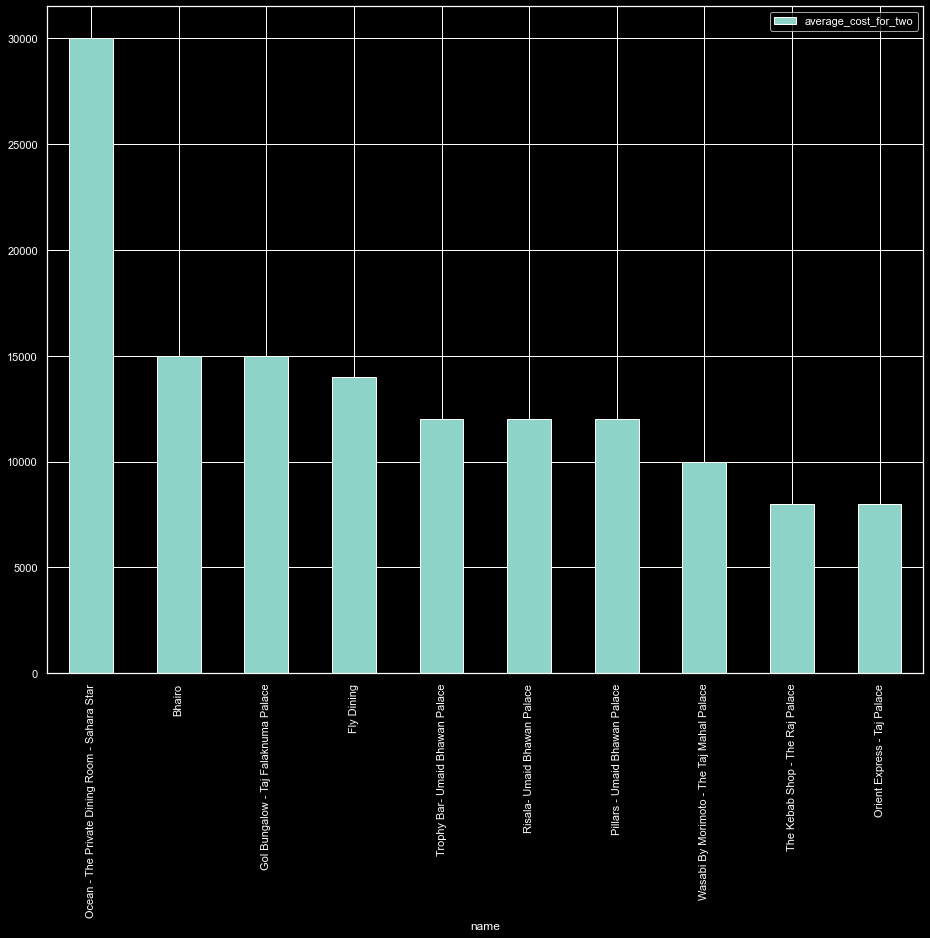

In [214]:
# Top 10 Most Expensive Restaurants with Approx. Cost for 2 People.

a = zomato_df.groupby('name')['average_cost_for_two'].max().to_frame().sort_values('average_cost_for_two',
                                                                                      ascending=False).head(10)
a.plot.bar()

In [215]:
#Alternate way - To make it Interactive, will make a use of "Plotly" Library over here.
len(zomato_df.groupby('name')['average_cost_for_two'].max().to_frame().sort_values('average_cost_for_two',
                                                                                      ascending=False).head(10).index)

10

In [216]:
zomato_df.groupby('name')['average_cost_for_two'].max().nlargest(10)

name
Ocean - The Private Dining Room - Sahara Star    30000
Bhairo                                           15000
Gol Bungalow - Taj Falaknuma Palace              15000
Fly Dining                                       14000
Pillars - Umaid Bhawan Palace                    12000
Risala- Umaid Bhawan Palace                      12000
Trophy Bar- Umaid Bhawan Palace                  12000
Wasabi By Morimoto - The Taj Mahal Palace        10000
Adaa - Taj Falaknuma Palace                       8000
Orient Express - Taj Palace                       8000
Name: average_cost_for_two, dtype: int32

In [217]:
#Alternate Visual - 
px.bar(data_frame=zomato_df,
      x=zomato_df.groupby('name')['average_cost_for_two'].max().nlargest(10).index,
      y=zomato_df.groupby('name')['average_cost_for_two'].max().nlargest(10),
      color=zomato_df.groupby('name')['average_cost_for_two'].max().nlargest(10))

<AxesSubplot:xlabel='average_cost_for_two', ylabel='Density'>

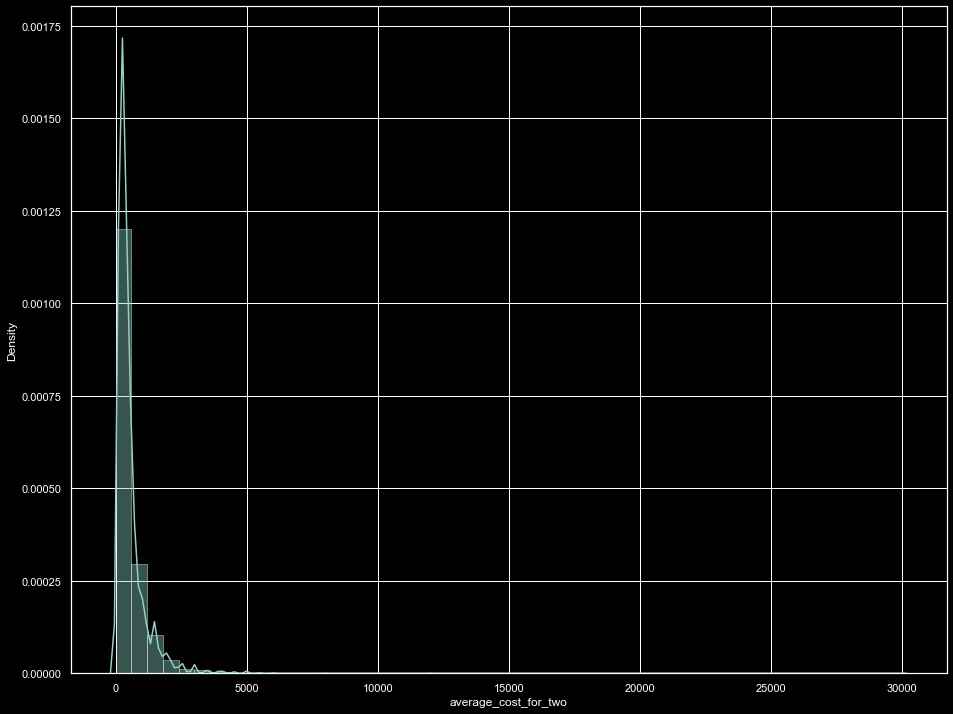

In [220]:
# What Pattern / Distribution average_cost_for_two follows.

sns.distplot(zomato_df['average_cost_for_two'])

In [221]:
#Q5. Find All the Restaurants that are below 500 (Budget Hotels) as well as Affordable.

#So, Let's 1st apply the filter to the DataFrame.

zomato_df[zomato_df['average_cost_for_two'] <= 500]

#So, this exactly is that DataFrame of entire Restaurant that are under Budget or that are Budgeted Restaurants which are
#somewhere around '26K' Entries.

res_id                   name    establishment      city  city_id  \
2       3401013          Bhagat Halwai      Quick Bites      Agra       34   
3       3400290          Bhagat Halwai      Quick Bites      Agra       34   
5       3400275         Domino's Pizza      Quick Bites      Agra       34   
6       3400296    Honeydew Restaurant      Quick Bites      Agra       34   
7       3400368         Domino's Pizza      Quick Bites      Agra       34   
...         ...                    ...              ...       ...      ...   
55562  19131870       The Indian Spice      Quick Bites  Vadodara       32   
55563  19142822  Shree Janta Ice Cream  Dessert Parlour  Vadodara       32   
55565  18019952            Geeta lodge    Casual Dining  Vadodara       32   
55566   3200996             Raju Omlet      Quick Bites  Vadodara       32   
55567   3201138                 Subway      Quick Bites  Vadodara       32   

          locality   latitude  longitude  \
2         Shahganj  27.182938  77.979684   
3      Civil Lines  27.205668  78.004799   
5      Civil Lines  27.201516  78.007556   
6       Dayal Bagh  27.222175  78.010174   
7         Sikandra  27.203930  77.954260   
...            ...        ...        ...   
55562    Manjalpur  22.284586  73.190002   
55563    Manjalpur  22.270516  73.196408   
55565     Alkapuri  22.317731  73.168107   
55566   Karelibaug  22.322455  73.197203   
55567        Akota  22.270027  73.143068   

                                             cuisines  average_cost_for_two  \
2                                   Fast Food, Mithai                   300   
3           Desserts, Bakery, Fast Food, South Indian                   300   
5                                    Pizza, Fast Food                   400   
6      North Indian, Fast Food, Chinese, South Indian                   500   
7                                    Pizza, Fast Food                   400   
...                                               ...                   ...   
55562                           North Indian, Chinese                   400   
55563                                       Ice Cream                   200   
55565                           Gujarati, Street Food                   250   
55566                                       Fast Food                   300   
55567                      Fast Food, Sandwich, Salad                   500   

       ...  rating_text votes  delivery No. of Cuisines  \
2      ...    Very Good   801        No               2   
3      ...    Very Good   693        No               4   
5      ...    Very Good   707       Yes               2   
6      ...    Very Good   647        No               4   
7      ...         Good   617       Yes               2   
...    ...          ...   ...       ...             ...   
55562  ...      Average    10       Yes               2   
55563  ...      Average     4        No               1   
55565  ...         Good   207       Yes               2   
55566  ...    Very Good   187        No               1   
55567  ...         Good   128        No               3   

                           type_of_meal takeaway    card_type cash_payment  \
2      ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3      ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
5                   ['Dinner', 'Lunch']        1   Debit Card            1   
6                   ['Dinner', 'Lunch']        1           No            1   
7                   ['Dinner', 'Lunch']        1   Debit Card            1   
...                                 ...      ...          ...          ...   
55562               ['Dinner', 'Lunch']        1           No            1   
55563                              ['']        1           No            1   
55565               ['Dinner', 'Lunch']        1   Debit Card            1   
55566                        ['Dinner']        1  Credit Card            1   
55567               ['Dinne

In [222]:
#Now, Let's access the 'name' and 'approx_cost(for two people)' Columns from the filtered DataFrame - 
    
df_budget = zomato_df[zomato_df['average_cost_for_two'] <= 500].loc[:,('name', 'average_cost_for_two')]
df_budget.head()

name  average_cost_for_two
2        Bhagat Halwai                   300
3        Bhagat Halwai                   300
5       Domino's Pizza                   400
6  Honeydew Restaurant                   500
7       Domino's Pizza                   400

In [223]:
#Now, Let's Reset the Index -
df_budget = df_budget.reset_index()
df_budget.drop(columns='index', axis=1, inplace=True)
df_budget.head()

#So this Exactly is our DataFrame.

name  average_cost_for_two
0        Bhagat Halwai                   300
1        Bhagat Halwai                   300
2       Domino's Pizza                   400
3  Honeydew Restaurant                   500
4       Domino's Pizza                   400

In [224]:
#Setting "name" Column as an "Index" - 
df_budget.set_index('name', inplace=True)

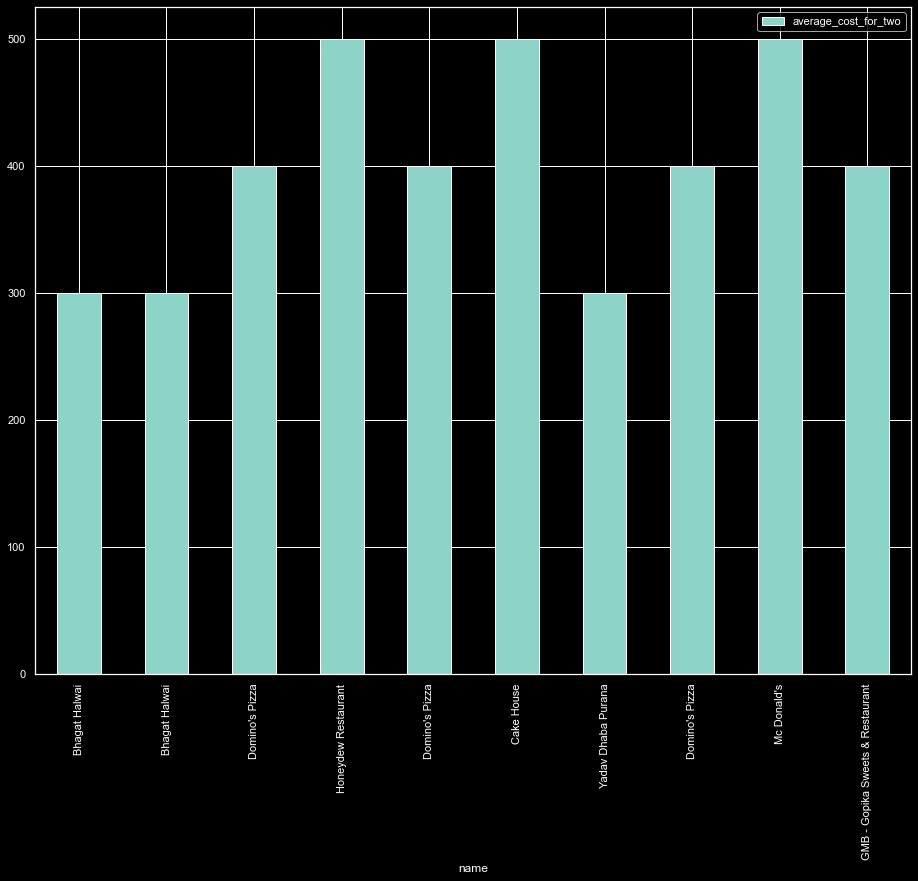

In [225]:
df_budget.head(10).plot.bar()

plt.xticks(rotation=90)

plt.show()

In [226]:
df_budget.index

Index(['Bhagat Halwai', 'Bhagat Halwai', 'Domino's Pizza',
       'Honeydew Restaurant', 'Domino's Pizza', 'Cake House',
       'Yadav Dhaba Purana', 'Domino's Pizza', 'Mc Donald's',
       'GMB - Gopika Sweets & Restaurant',
       ...
       'Raju Bhai Chhole Kulche', 'Indian Salt', 'MN Paratha Plaza',
       'New Swagat Corner', 'Red China', 'The Indian Spice',
       'Shree Janta Ice Cream', 'Geeta lodge', 'Raju Omlet', 'Subway'],
      dtype='object', name='name', length=39545)

In [227]:
#Converting into DataFrame using "reset_index()", So that our "name" Column will not be remains as "Index" anymore.
    #By doing that later we can Access the particular Element of the Column through "Indexing".
    
df_budget.reset_index(inplace=True)
df_budget

name  average_cost_for_two
0              Bhagat Halwai                   300
1              Bhagat Halwai                   300
2             Domino's Pizza                   400
3        Honeydew Restaurant                   500
4             Domino's Pizza                   400
...                      ...                   ...
39540       The Indian Spice                   400
39541  Shree Janta Ice Cream                   200
39542            Geeta lodge                   250
39543             Raju Omlet                   300
39544                 Subway                   500

[39545 rows x 2 columns]

In [228]:
#Accesing that 2nd Name and trying to Change to an Appropriate One -
df_budget['name'][1] = 'Bhagat Haalwai'

<AxesSubplot:xlabel='name'>

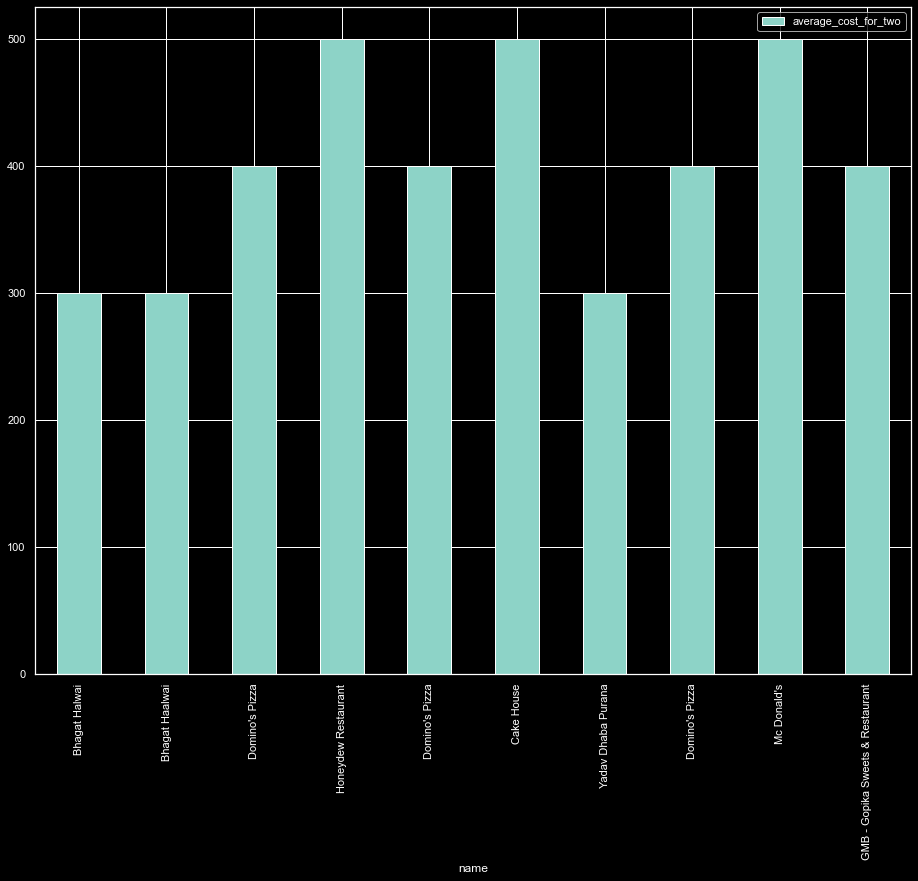

In [229]:
#Now, Again plot the Chart -
df_budget.set_index('name', inplace=True)
df_budget.head(10).plot.bar()

#Here, we can see the Corrected Name.

# Perform Spatial Analysis -

In [230]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

In [231]:
# Total Restaurants that have good Rating > 4 and that are under Budget too.

zomato_df[(zomato_df['aggregate_rating'] > 4) & (zomato_df['average_cost_for_two'] <= 500)].shape



(3983, 23)

In [232]:
#Alternate Way -
len(zomato_df[(zomato_df['aggregate_rating'] > 4) & (zomato_df['average_cost_for_two'] <= 500)])

3983

In [233]:
#Now, "Total Unique Number of Restaurants" -->

len(zomato_df[(zomato_df['aggregate_rating'] > 4) & (zomato_df['average_cost_for_two'] <= 500)]['name'].unique())

2891

Conclusion -

It is showing, that We have somewhere around "2891" Restaurants that are "Affordable" as well as they have good "Rating".
So, that s Final Conclusion of our Problem Statement.

In [234]:
#Let's see the DataFrame -
df_affordable_rest = zomato_df[(zomato_df['aggregate_rating'] > 4) & (zomato_df['average_cost_for_two'] <= 500)]
df_affordable_rest.head()

res_id                 name establishment  city  city_id     locality  \
2   3401013        Bhagat Halwai   Quick Bites  Agra       34     Shahganj   
3   3400290        Bhagat Halwai   Quick Bites  Agra       34  Civil Lines   
6   3400296  Honeydew Restaurant   Quick Bites  Agra       34   Dayal Bagh   
13  3400457   Yadav Dhaba Purana         Dhaba  Agra       34  Civil Lines   
17  3400279          Mc Donald's   Quick Bites  Agra       34  Civil Lines   

     latitude  longitude                                        cuisines  \
2   27.182938  77.979684                               Fast Food, Mithai   
3   27.205668  78.004799       Desserts, Bakery, Fast Food, South Indian   
6   27.222175  78.010174  North Indian, Fast Food, Chinese, South Indian   
13  27.195836  77.998213                                    North Indian   
17  27.201366  78.008746                               Burger, Fast Food   

    average_cost_for_two  ...  rating_text votes  delivery No. of Cuisines  \
2                    300  ...    Very Good   801        No               2   
3                    300  ...    Very Good   693        No               4   
6                    500  ...    Very Good   647        No               4   
13                   300  ...    Very Good   361        No               1   
17                   500  ...    Very Good   837       Yes               2   

                        type_of_meal takeaway    card_type cash_payment  \
2   ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3   ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
6                ['Dinner', 'Lunch']        1           No            1   
13               ['Dinner', 'Lunch']        1           No            1   
17               ['Dinner', 'Lunch']        1   Debit Card            1   

           Seating Pure Veg  
2   Indoor Seating      Yes  
3   Indoor Seating      Yes  
6   Indoor Seating      Yes  
13  Indoor Seating      Yes  
17  Indoor Seating       No  

[5 rows x 23 columns]

In [235]:
# Which are the (most) Foodie Areas?    

#Suppose, we want 'Top 20 Places'.

# zomato_df['location'].value_counts().nlargest(20)      #OR
restaurant_location = zomato_df['locality'].value_counts()[0:20]
restaurant_location

Civil Lines              752
Model Town               447
Shastri Nagar            392
Vijay Nagar              380
Gomti Nagar              274
Lashkar                  224
College Road             217
CIDCO                    211
Tirumala                 208
Bistupur                 204
Bedeswar                 199
Sardarpura               191
Patia                    176
Panaji                   176
MG Road                  175
Lalpur                   173
Kotecha Nagar            170
Talwandi                 169
Maharana Pratap Nagar    163
Cantt                    162
Name: locality, dtype: int64

Text(0.5, 1.0, 'Most Foodie Areas of India')

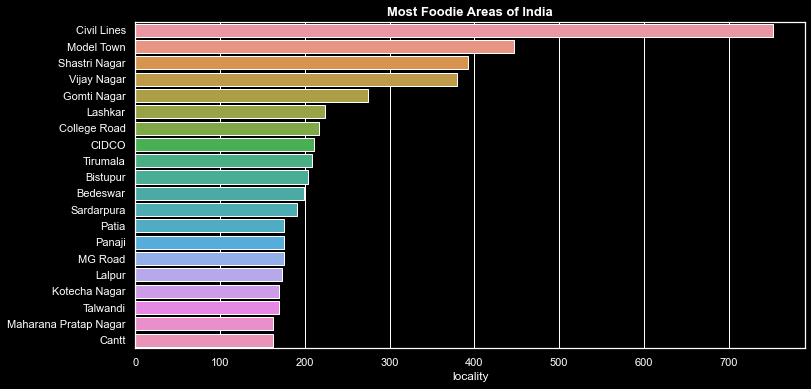

In [236]:
#Now, Let's Visualize this Data -
plt.figure(figsize=(12,6))

sns.barplot(x=restaurant_location,
           y=restaurant_location.index)

plt.title('Most Foodie Areas of India', fontsize=13, fontweight='bold')

Conclusion -

From this Visualization, we can say that "civil lines", "Model town", and "Shastri nagar" has the Most Number of Restaurants.
So, it means "civil lines" dominates the section by having around "752" Restaurants.

In [237]:
#Alternate Visual -
px.bar(data_frame=restaurant_location,
      x=restaurant_location.index,
      y=restaurant_location,
      color=restaurant_location)

# The higher the number of services/cuisines provided by a restaurant, more likely it is to receive higher ratings

In [238]:
zomato_df.head()

res_id                            name  establishment  city  city_id  \
0  3400299                     Bikanervala    Quick Bites  Agra       34   
1  3400005  Mama Chicken Mama Franky House    Quick Bites  Agra       34   
2  3401013                   Bhagat Halwai    Quick Bites  Agra       34   
3  3400290                   Bhagat Halwai    Quick Bites  Agra       34   
4  3401744     The Salt Cafe Kitchen & Bar  Casual Dining  Agra       34   

      locality   latitude  longitude  \
0     Khandari  27.211450  78.002381   
1   Agra Cantt  27.160569  78.011583   
2     Shahganj  27.182938  77.979684   
3  Civil Lines  27.205668  78.004799   
4      Tajganj  27.157709  78.052421   

                                            cuisines  average_cost_for_two  \
0  North Indian, South Indian, Mithai, Street Foo...                   700   
1  North Indian, Mughlai, Rolls, Chinese, Fast Fo...                   600   
2                                  Fast Food, Mithai                   300   
3          Desserts, Bakery, Fast Food, South Indian                   300   
4                 North Indian, Continental, Italian                  1000   

   ...  rating_text votes  delivery No. of Cuisines  \
0  ...    Very Good   814       Yes               5   
1  ...    Very Good  1203       Yes               6   
2  ...    Very Good   801        No               2   
3  ...    Very Good   693        No               4   
4  ...    Excellent   470        No               3   

                       type_of_meal takeaway    card_type cash_payment  \
0               ['Dinner', 'Lunch']        1  Credit Card            1   
1               ['Dinner', 'Lunch']        1           No            1   
2  ['Breakfast', 'Lunch', 'Dinner']        1           No            1   
3  ['Breakfast', 'Lunch', 'Dinner']        1  Credit Card            0   
4               ['Dinner', 'Lunch']        0   Debit Card            1   

          Seating Pure Veg  
0  Indoor Seating      Yes  
1  Indoor Seating       No  
2  Indoor Seating      Yes  
3  Indoor Seating      Yes  
4  Indoor Seating       No  

[5 rows x 23 columns]

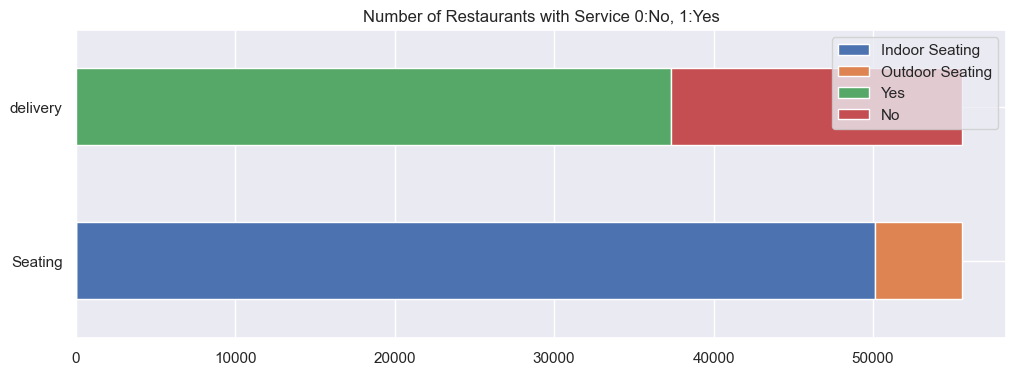

In [239]:
with plt.style.context('bmh', after_reset = True):
    sns.set(rc={'figure.figsize':(11.7,10.27)})
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['Seating', 'delivery']: 
        tmp[col] = zomato_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)

    ax.set_title('Number of Restaurants with Service 0:No, 1:Yes')
    plt.show()

In [240]:
zomato_df['Type_of_Restaurant'] = zomato_df['establishment'].str.replace(',' , '') 
zomato_df['Type_of_Restaurant'] = zomato_df['establishment'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

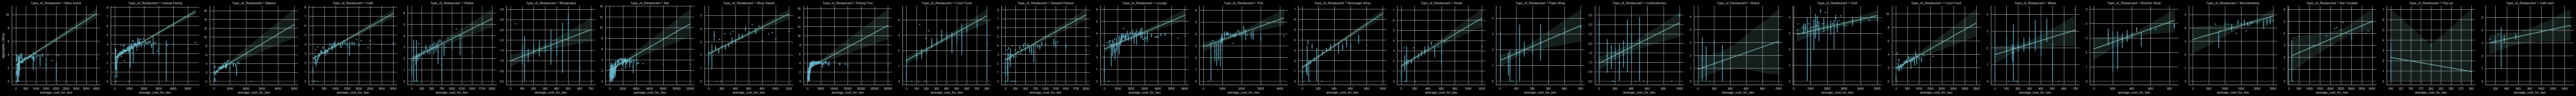

In [241]:
g = sns.lmplot('average_cost_for_two', 'aggregate_rating', col='Type_of_Restaurant', data=zomato_df, x_estimator=np.mean,
               markers=".", scatter_kws=dict(color='c'),sharex=False,sharey=False)

sns.set(rc={'figure.figsize':(15.7,12.27)})
g.map(plt.axhline, color="k", ls=":");

# Approx cost vs rating

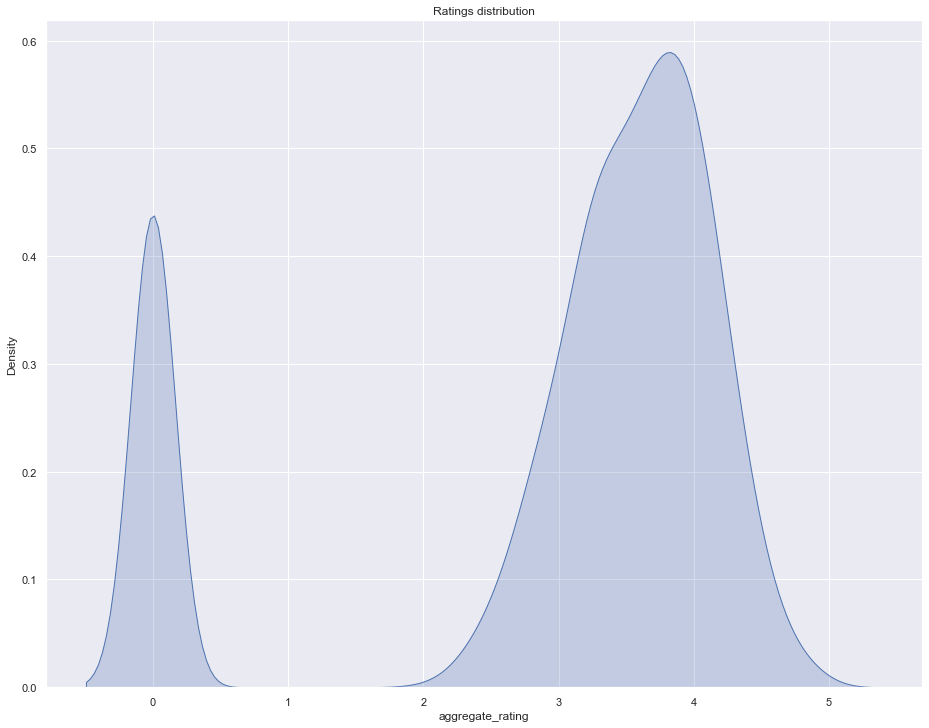

In [258]:
# rating distribution
sns.kdeplot(zomato_df['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

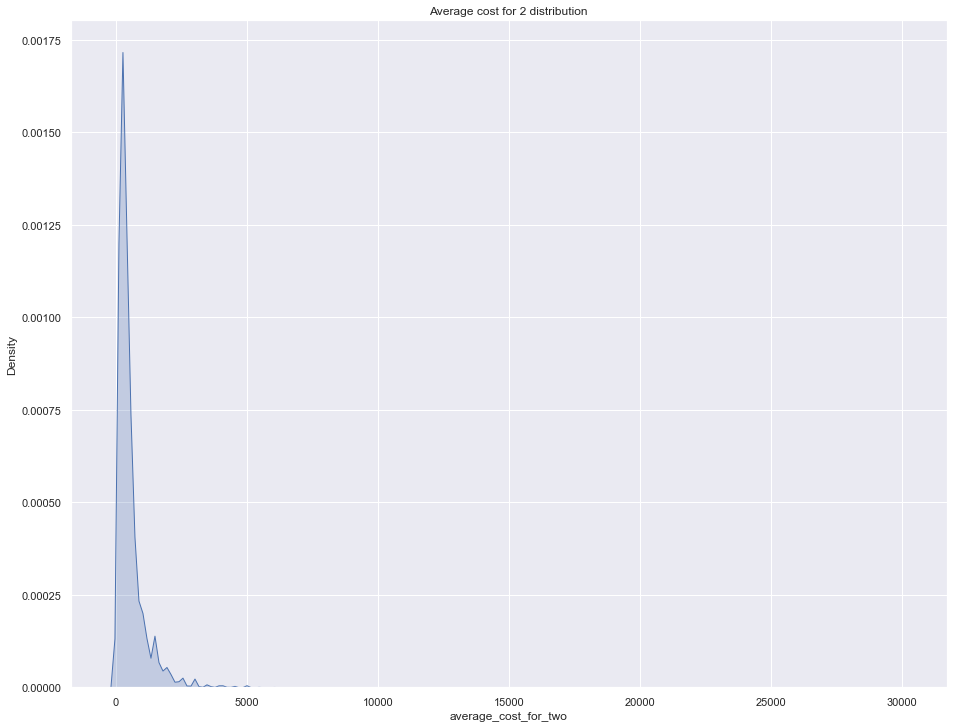

In [260]:
# Avergae cost for two distribution

sns.kdeplot(zomato_df['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

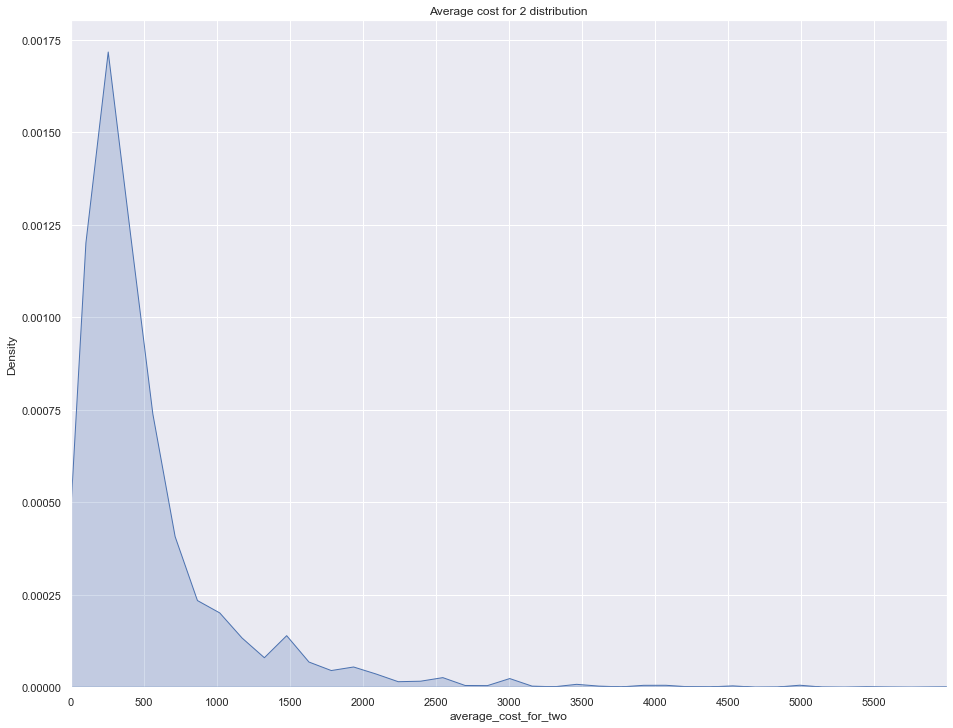

In [261]:
sns.kdeplot(zomato_df['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

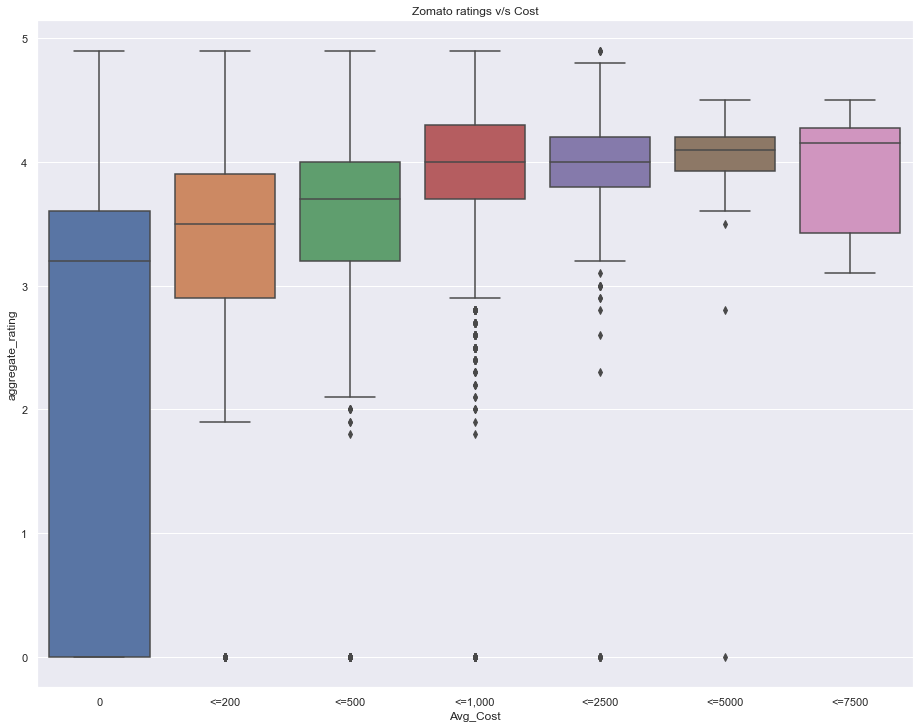

In [242]:
zomato_df["Avg_Cost"] = pd.cut(zomato_df["average_cost_for_two"],bins = [0, 200, 500, 1000,  2500, 5000, 7500, 10000],
                                  labels = ["0", "<=200", "<=500", "<=1,000","<=2500", "<=5000", "<=7500",])

vis13 = sns.boxplot(x = zomato_df["Avg_Cost"], y = zomato_df["aggregate_rating"]).set_title("Zomato ratings v/s Cost")

<AxesSubplot:title={'center':'Cost vs Agg Rating'}, xlabel='average_cost_for_two', ylabel='aggregate_rating'>

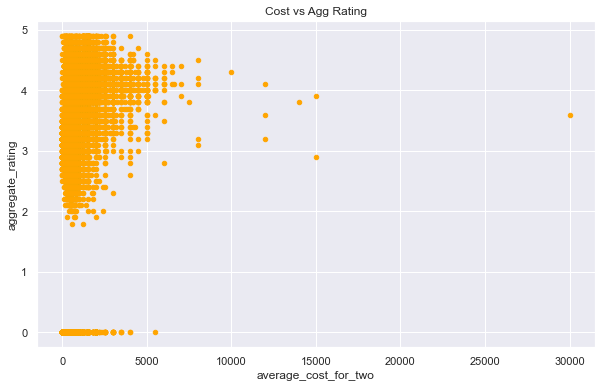

In [243]:
#Is there any relation between average cost for two and aggregate rating of restaurants
zomato_df.plot.scatter(x='average_cost_for_two',y='aggregate_rating',figsize=(10,6), color='orange', title="Cost vs Agg Rating")

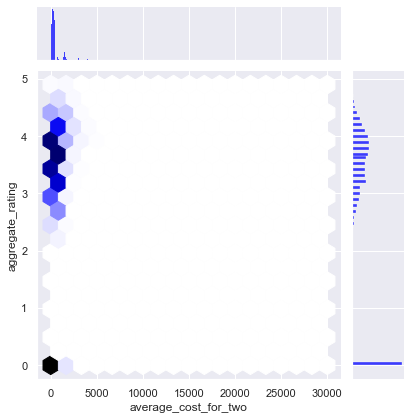

In [244]:
#Better view of relation between average cost for two and aggregate rating of restaurants
sns.jointplot(x='average_cost_for_two',y='aggregate_rating',kind ='hex',gridsize=18,data =zomato_df,color='blue')

# Highlights wordcloud

In [245]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [246]:
from wordcloud import WordCloud, STOPWORDS

In [252]:
hl = []
zomato_df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


In [254]:
hl1 = []
zomato_df["cuisines"].apply(lambda x : hl1.extend(x[2:-2].split("', '")))
hl1 = pd.Series(hl1)
print("Total number of unique cuisines = ", hl1.nunique())

Total number of unique cuisines =  9371


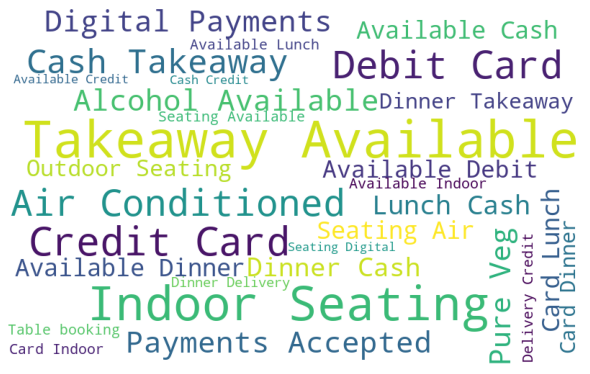

In [255]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

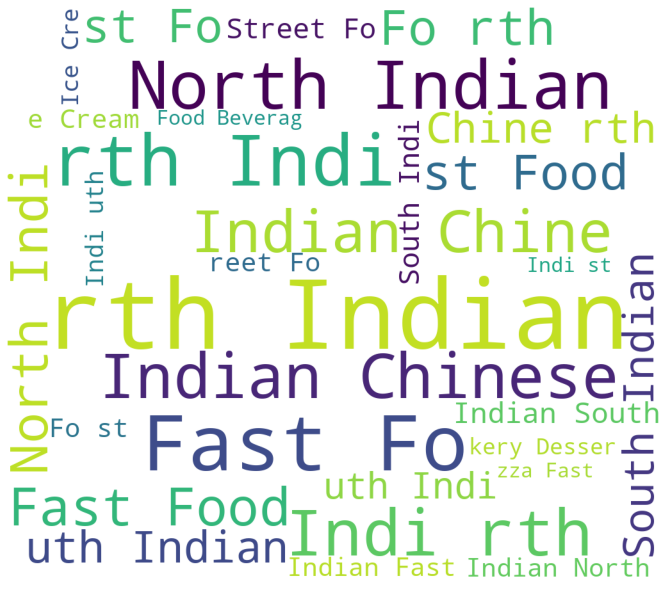

In [256]:
hl_str = ""
for i in hl1:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 1024, height = 900, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()